# DATA

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv(r'E:\M&L excel\Comcast_telecom_complaints_data.csv')
print(data.shape)
data.head()

(2224, 11)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


# Analysis

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [3]:
data.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [4]:
#converting date in to date format
data.drop('Date_month_year',axis=1,inplace=True)
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 173.9+ KB


Months in which complaints registered are
 [4 5 6]
No.of compliants in each month are
 6    1280
4     545
5     399
Name: Month, dtype: int64


Text(0.5, 1.0, 'Trend Chart')

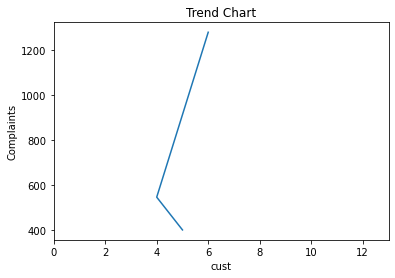

In [5]:
#trend chart for the number of complaints at monthly and daily granularity levels.

#getting frequencies of every unique value in date

import matplotlib.pyplot as plt
import seaborn as sns
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['day']=pd.DatetimeIndex(data['Date']).day
data['day of week']=pd.DatetimeIndex(data['Date']).dayofweek
x=data['Month']
y={}
print("Months in which complaints registered are\n",data['Month'].unique())
print("No.of compliants in each month are\n",data['Month'].value_counts())
l=data['Month'].value_counts()
d=pd.DataFrame({'Complaints':l,'cust':l.index})
gr=sns.lineplot(x='cust',y='Complaints',data=d,sort=False,markers='o')
ax = gr.axes
ax.set_xlim(0,13)
plt.title("Trend Chart")

(0.0, 32.0)

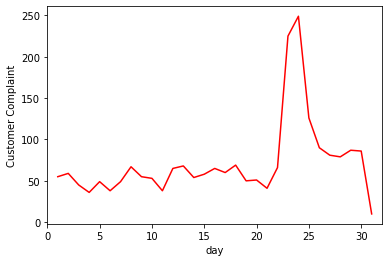

In [6]:
#trend chart for daily granularity levels.

byday = data.groupby('day').count().reset_index()
lp = sns.lineplot(x='day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

In [7]:
#complaints which are sorted in most to least frequent

freqcomp=data['Customer Complaint'].value_counts()
freqcomp

Comcast                                        83
Comcast Internet                               18
Comcast Data Cap                               17
comcast                                        13
Comcast Data Caps                              11
                                               ..
Consistent speed/connectivity with internet     1
Billings Charges & Credits                      1
Poor internet                                   1
Internet speeds disclosure on bill              1
Comcast Throttling my Internet Connection       1
Name: Customer Complaint, Length: 1841, dtype: int64

In [17]:
#word cloud to analyze text

#stop words to remove few frquent words/adjectives 

#plotting the most frequent words as large and least as small

from wordcloud import WordCloud, STOPWORDS
common_complaints = data['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()
list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')
for word in list_stops:
    STOPWORDS.add(word)
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='pink',
                      width=1200,
                      height=1000).generate(common_complaints)

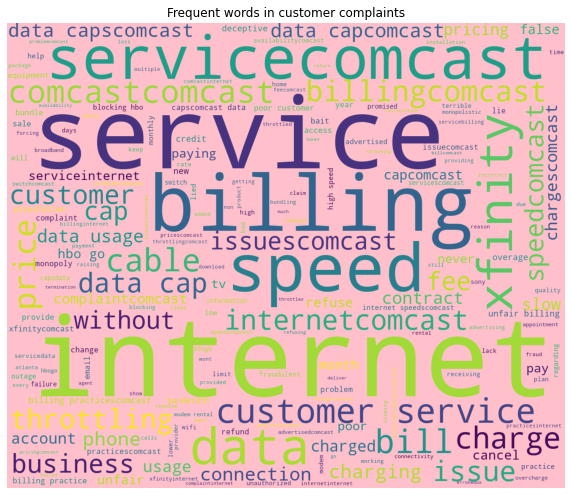

In [18]:
#type of complaints related to technology highlighted from max to min

plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words in customer complaints')
plt.axis('off')
plt.show()

In [10]:
#generelizing the class labels

lst=[]
for Status in data['Status']:
    if Status=="Open" or Status=="Pending":
        lst.append("Open")
    else:
        lst.append("Closed")
data['Status2'] = lst

In [11]:
#state wise status of complaints

#group by to group state and status

ststatus=data.groupby(['State','Status2']).size().unstack()
print(ststatus)

#here there are few states which dont have complaints in open state for this kind of states assign NA as 0
ststatus.fillna(0)

Status2               Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

Status2,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

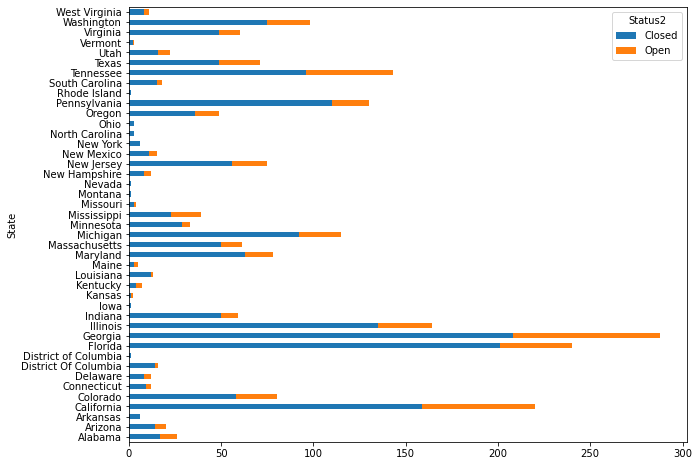

In [12]:
#state wisecomplaints in stacked bar chart

ststatus.plot(kind="barh", figsize=(10,8), stacked=True)

In [13]:
#state with max complaints
data['State'].value_counts()
#the highest complaints are registered in state Georiga

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
Connecticut              12
New Hampshire            12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

In [14]:
#the state with highest unsolved complinats

newstatus=ststatus.sort_values('Open',ascending=False)
newstatus.iloc[0]

Status2
Closed    208.0
Open       80.0
Name: Georgia, dtype: float64

In [15]:
#percentage of solved and unsolved

newstatus['Resolved_cmp_prct'] = newstatus['Closed']/newstatus['Closed'].sum()*100
newstatus['Unresolved_cmp_prct'] = newstatus['Open']/newstatus['Open'].sum()*100
newstatus

Status2,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.185120,15.473888
California,159.0,61.0,9.314587,11.798839
Tennessee,96.0,47.0,5.623902,9.090909
Florida,201.0,39.0,11.775044,7.543520
Illinois,135.0,29.0,7.908612,5.609284
Michigan,92.0,23.0,5.389572,4.448743
Washington,75.0,23.0,4.393673,4.448743
Colorado,58.0,22.0,3.397774,4.255319
Texas,49.0,22.0,2.870533,4.255319


In [16]:
#unique values in recieved via

print("Modes of recieving complaints \n")
print(data['Received Via'].value_counts())

#percent of complaints solved according to mode of registered

print("\n\npercent of complaints solved according to mode of registered")
solved = data.groupby(['Received Via','Status2']).size().unstack().fillna(0)
solved['resolved'] = solved['Closed']/solved['Closed'].sum()*100
solved['resolved']

Modes of recieving complaints 

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64


percent of complaints solved according to mode of registered


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64